In [ ]:
# Par Guechtouli Anis & Hammamid Ahmed Issam

In [ ]:
# Partie 1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Créer un graphe orienté
graph = nx.DiGraph()

# Ajouter les arêtes et leurs capacités d'après l'image
graph.add_edge(1, 2, capacity=2)
graph.add_edge(1, 3, capacity=5)
graph.add_edge(2, 3, capacity=2)
graph.add_edge(2, 6, capacity=4)
graph.add_edge(3, 4, capacity=3)
graph.add_edge(3, 5, capacity=6)
graph.add_edge(4, 5, capacity=1)
graph.add_edge(4, 7, capacity=2)
graph.add_edge(5, 8, capacity=4)
graph.add_edge(6, 8, capacity=7)
graph.add_edge(6, 4, capacity=1)
graph.add_edge(6, 7, capacity=4)
graph.add_edge(7, 8, capacity=2)

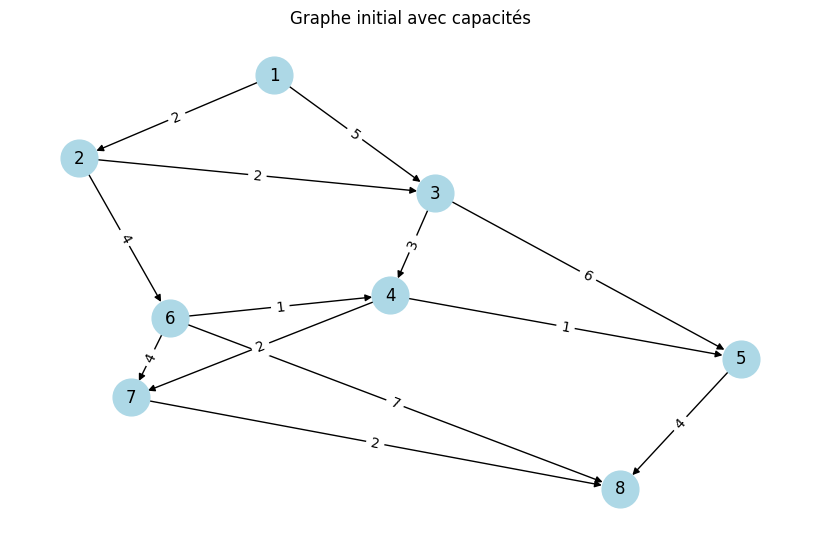

In [ ]:

# Visualiser le graphe initial
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(graph,
                       seed=41)  # Positionnement des noeuds
nx.draw(graph,
        pos,
        with_labels=True,
        node_size=700,
        node_color="lightblue")
nx.draw_networkx_edge_labels(graph,
                             pos,
                             edge_labels=nx.get_edge_attributes(graph,
                                                                'capacity'))
plt.title("Graphe initial avec capacités")
plt.show()

In [ ]:
# list of all possible ways from 1 to 8 [from 1 to 5, 1 to 6, 1 to 4] if all ways pass by one node, remove its arc to goal
# calculate sum of removed
# calculate sum of removing the other arcs instad
# optimization style of df cuts showing all possible cuts
# keep only ones preventing 1 from reaching 8

# which arcs to eliminate to stop it from reaching 8
# eliminate arcs recursively trying each possible option to find min cut

In [54]:
# exercice 2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

graph_2 = nx.Graph()
# 21 sommets
sommets = [i for i in range(1, 22)]
graph_2.add_nodes_from(sommets)

In [10]:
aretes = [(1,4),(2,5),(2,6),(3,4),(3,7),(4,5),(5,6),
          (5,15),(5,8),(6,14),(7,10),(7,11),(7,12),
          (8,9),(8,13),(9,13),(10,11),(10,12),(11,12),
          (12,13),(13,16),(14,15),(15,17),(15,19),(15,20),
          (16,17),(16,20),(16,21),(18,19),(19,20),(19,21)]
graph_2.add_edges_from(aretes)

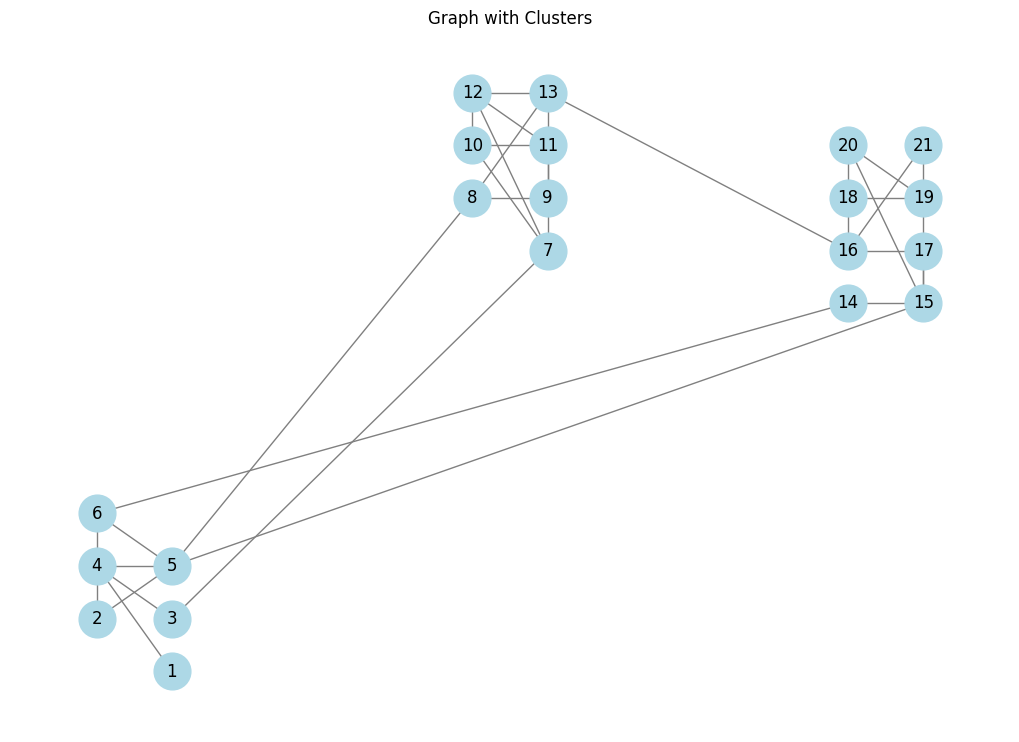

In [ ]:
G = nx.Graph()
G.add_edges_from(aretes)

# Define clusters
cluster_1 = {1, 2, 3, 4, 5, 6}
cluster_2 = {7, 8, 9, 10, 11, 12, 13}
cluster_3 = {14, 15, 16, 17, 18, 19, 20, 21}

# Define positions for each cluster
base_positions = {
    1: (-5, 0),  # Cluster 1 position
    2: (0, 5),   # Cluster 2 position
    3: (5, 0)    # Cluster 3 position
}

# Create positions for each node
pos = {}
for node in cluster_1:
    pos[node] = (base_positions[1][0] + (node % 2), base_positions[1][1] + (node // 2))

for node in cluster_2:
    pos[node] = (base_positions[2][0] + (node % 2), base_positions[2][1] + (node // 2))

for node in cluster_3:
    pos[node] = (base_positions[3][0] + (node % 2), base_positions[3][1] + (node // 2))

# Visualize the graph
plt.figure(figsize=(10, 7))
nx.draw(G,
        pos,
        with_labels=True,
        node_color="lightblue",
        node_size=700,
        edge_color="gray")
plt.title("Graph with Clusters")
plt.show()

In [19]:
# Define the function to calculate modularity for each cluster
def modularité(G, clusters):
    m = len(G.edges())  # Total number of edges in the graph
    results = []  # To store results for each cluster

    # Loop through each cluster
    for idx, cluster in enumerate(clusters, 1):
        # Calculate intra-cluster edges (i)
        intra_cluster = [edge for edge in G.edges() if edge[0] in cluster and edge[1] in cluster]
        i = len(intra_cluster)

        # Calculate the degree of each node in the cluster (d)
        node_degrees = {node: 0 for node in cluster}
        for edge in G.edges():
            for node in edge:
                if node in cluster:
                    node_degrees[node] += 1
        d = sum(node_degrees.values())

        # Calculate modularity components I and D
        I = i / m
        D = (d / (2 * m)) ** 2

        # Calculate modularity Q
        Q = I - D

        # Store results
        results.append([f'Cluster {idx}', i, d, I, D, Q])

    # Create a pandas DataFrame with the results
    df = pd.DataFrame(results, columns=["cluster", "I", "d", "I/m", "(d/2m)^2", "Modularité"])
    return df

clusters = [cluster_1, cluster_2, cluster_3]

# Calculate modularity for each cluster
modularity_df = modularité(G, clusters)

# Output the results DataFrame
modularity_df

,cluster,I,d,I/m,(d/2m)^2,Modularité
0,Cluster 1,6,16,0.193548,0.066597,0.126951
1,Cluster 2,10,23,0.322581,0.137617,0.184964
2,Cluster 3,10,23,0.322581,0.137617,0.184964


In [20]:
modularity_df["Modularité"].sum()

0.49687825182101975

In [ ]:
# Exercice 3

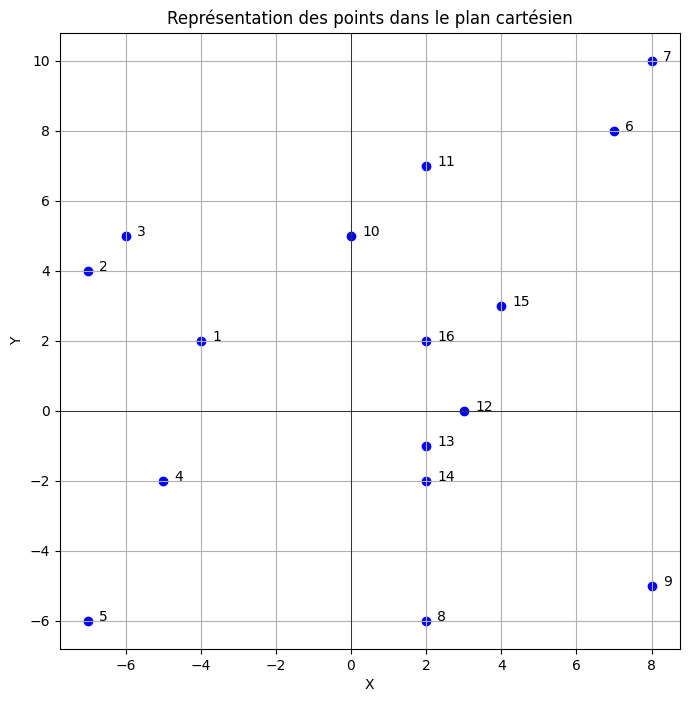

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Liste des points dans le plan cartésien
points = np.array([
    (-4, 2),(-7, 4),(-6, 5), (-5, -2),
    (-7, -6),(7, 8), (8, 10),(2, -6),  (8, -5), (0, 5), (2, 7),
    (3, 0), (2, -1), (2, -2),(4, 3), (2, 2)
])

# Visualisation des points
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], color='blue')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.3, y, str(i + 1), fontsize=10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title("Représentation des points dans le plan cartésien")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [53]:
# Calcul des distances Euclidiennes entre les points
dist_matrix = squareform(pdist(points,
                               metric='euclidean'))

# Affichage de la matrice des distances sous forme de DataFrame
dist_df = pd.DataFrame(dist_matrix, 
                    index=[f"Point {i+1}" for i in range(len(points))], 
                    columns=[f"Point {i+1}" for i in range(len(points))])

print("Matrice des distances Euclidiennes :")
dist_df.round(2)

Matrice des distances Euclidiennes :


,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,Point 11,Point 12,Point 13,Point 14,Point 15,Point 16
Point 1,0.00,3.61,3.61,4.12,8.54,12.53,14.42,10.00,13.89,5.00,7.81,7.28,6.71,7.21,8.06,6.00
Point 2,3.61,0.00,1.41,6.32,10.00,14.56,16.16,13.45,17.49,7.07,9.49,10.77,10.30,10.82,11.05,9.22
Point 3,3.61,1.41,0.00,7.07,11.05,13.34,14.87,13.60,17.20,6.00,8.25,10.30,10.00,10.63,10.20,8.54
Point 4,4.12,6.32,7.07,0.00,4.47,15.62,17.69,8.06,13.34,8.60,11.40,8.25,7.07,7.00,10.30,8.06
Point 5,8.54,10.00,11.05,4.47,0.00,19.80,21.93,9.00,15.03,13.04,15.81,11.66,10.30,9.85,14.21,12.04
Point 6,12.53,14.56,13.34,15.62,19.80,0.00,2.24,14.87,13.04,7.62,5.10,8.94,10.30,11.18,5.83,7.81
Point 7,14.42,16.16,14.87,17.69,21.93,2.24,0.00,17.09,15.00,9.43,6.71,11.18,12.53,13.42,8.06,10.00
Point 8,10.00,13.45,13.60,8.06,9.00,14.87,17.09,0.00,6.08,11.18,13.00,6.08,5.00,4.00,9.22,8.00
Point 9,13.89,17.49,17.20,13.34,15.03,13.04,15.00,6.08,0.00,12.81,13.42,7.07,7.21,6.71,8.94,9.22
Point 10,5.00,7.07,6.00,8.60,13.04,7.62,9.43,11.18,12.81,0.00,2.83,5.83,6.32,7.28,4.47,3.61


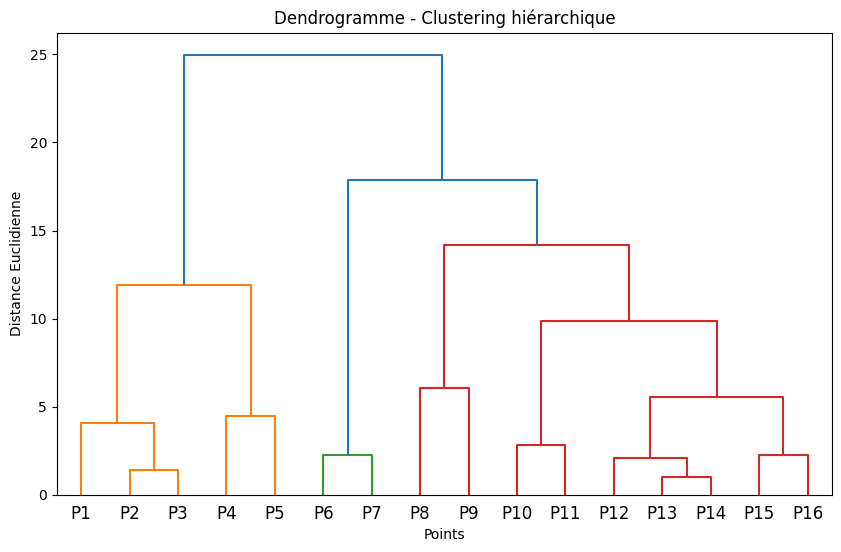

In [54]:
# Appliquer la méthode de linkage
linkage_matrix = linkage(points, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=[f"P{i+1}" for i in range(len(points))])
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Points")
plt.ylabel("Distance Euclidienne")
plt.show()

Cluster 1 :
[[-4  2]
 [-7  4]
 [-6  5]
 [-5 -2]
 [-7 -6]]

Cluster 2 :
[[ 7  8]
 [ 8 10]
 [ 2 -6]
 [ 8 -5]
 [ 0  5]
 [ 2  7]
 [ 3  0]
 [ 2 -1]
 [ 2 -2]
 [ 4  3]
 [ 2  2]]


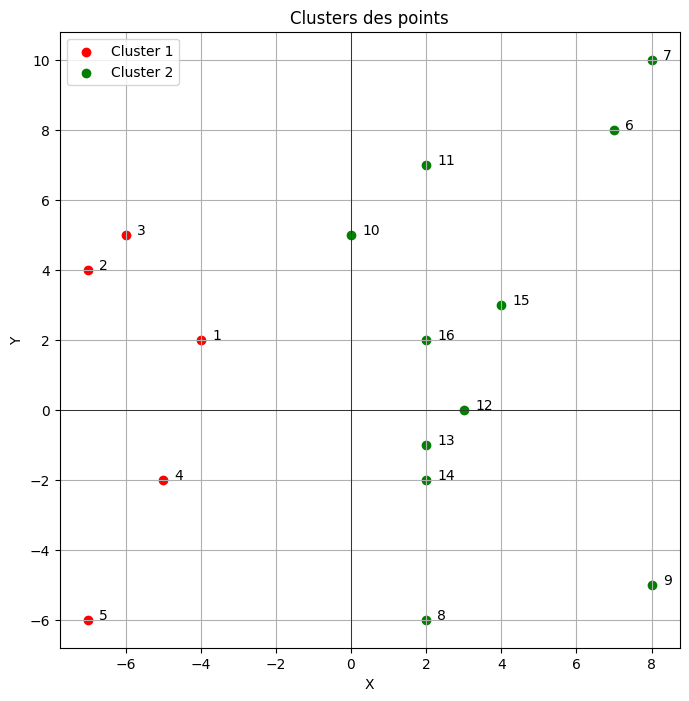

In [55]:
# Découper le dendrogramme en deux clusters principaux
clusters = fcluster(linkage_matrix, 2, criterion='maxclust')

# Affichage des deux clusters
cluster_1 = points[clusters == 1]
cluster_2 = points[clusters == 2]

print("Cluster 1 :")
print(cluster_1)

print("\nCluster 2 :")
print(cluster_2)

# Visualisation des clusters
plt.figure(figsize=(8, 8))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='green', label='Cluster 2')
for i, (x, y) in enumerate(points):
    plt.text(x + 0.3, y, str(i + 1), fontsize=10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title("Clusters des points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
